# 一、数据分析
***
Author: Jiacheng 

Time: 2020-01-06
***

* 数据分析
    * 缺失值分析
    * 特征值分析
    * 是否有单调特征列(单调的特征列很大可能是时间)
    * 特征nunique分布
    * 出现在测试集中的community，但是在训练集中数量较少
    * 统计特征值出现频次大于100的特征
    * Label分布
    * 不同的特征值的样本的label的分布

# 赛题分析
比赛要求参赛选手根据给定的数据集，建立模型，预测房屋租金。  
数据集中的数据类别包括租赁房源、小区、二手房、配套、新房、土地、人口、客户、真实租金等。  
这是典型的回归预测。  
  
## 1. 预测指标
#### 回归结果评价标准采用R-Square
**R2（R-Square）的公式为**：
残差平方和：
$$
SS_{res}=\sum\left(y_{i}-\hat{y}_{i}\right)^{2}
$$
总平均值:
$$
SS_{tot}=\sum\left(y_{i}-\overline{y}_{i}\right)^{2}
$$

其中$\overline{y}$表示$y$的平均值
得到$R^2$表达式为：
$$
R^{2}=1-\frac{SS_{res}}{SS_{tot}}=1-\frac{\sum\left(y_{i}-\hat{y}_{i}\right)^{2}}{\sum\left(y_{i}-\overline{y}\right)^{2}}
$$
$R^2$用于度量因变量的变异中可由自变量解释部分所占的比例，取值范围是 0~1，$R^2$越接近1,表明回归平方和占总平方和的比例越大,回归线与各观测点越接近，用x的变化来解释y值变化的部分就越多,回归的拟合程度就越好。所以$R^2$也称为拟合优度（Goodness of Fit）的统计量。

$y_{i}$表示真实值，$\hat{y}_{i}$表示预测值，$\overline{y}_{i}$表示样本均值。得分越高拟合效果越好。
  
  
## 2. 数据概况

**1.租赁基本信息：**
* ID——房屋编号　　　　　　　　　　　　　　　　　　
* area——房屋面积 　　　
* rentType——出租方式：整租/合租/未知　
* houseType——房型 　　　　　　　　　
* houseFloor——房间所在楼层：高/中/低　　　　　
* totalFloor——房间所在的总楼层数　　　　　　　　
* houseToward——房间朝向　　　　　　　　　　　
* houseDecoration——房屋装修　

* tradeTime——成交日期　　　　　　　　　　　　　　　
* tradeMoney——成交租金　

**2.小区信息：**
* CommunityName——小区名称　　　　　　　　
* city——城市　　　　　　　　　　　　　　　　　
* region——地区　　　　　　　　　　　　　　　
* plate——区域板块　　　　　　　　　　　　　　
* buildYear——小区建筑年代　　　　　　　　　　
* saleSecHouseNum——该板块当月二手房挂牌房源数　　　

**3.配套设施：**
* subwayStationNum——该板块地铁站数量　　　　　　　
* busStationNum——该板块公交站数量　　　　　　　　　
* interSchoolNum——该板块国际学校的数量　　　　　　
* schoolNum——该板块公立学校的数量　　　　　　　　
* privateSchoolNum——该板块私立学校数量　　　　　
* hospitalNum——该板块综合医院数量　　　　　　　　　
* DrugStoreNum——该板块药房数量　　　　　　　　
* gymNum——该板块健身中心数量　　　　　　　　　　
* bankNum——该板块银行数量　　　　　　　　　　　
* shopNum——该板块商店数量　　　　　　　　　　　
* parkNum——该板块公园数量　　　　　　　　　　　
* mallNum——该板块购物中心数量　　　　　　　　　
* superMarketNum——该板块超市数量　　　　　　　

**4.其他信息：**
* totalTradeMoney——该板块当月二手房成交总金额　　　
* totalTradeArea——该板块二手房成交总面积　　　　　　
* tradeMeanPrice——该板块二手房成交均价　　　　　　　
* tradeSecNum——该板块当月二手房成交套数　　　　　

* totalNewTradeMoney——该板块当月新房成交总金额　　　
* totalNewTradeArea——该板块当月新房成交的总面积　　　
* totalNewMeanPrice——该板块当月新房成交均价　　　　　
* tradeNewNum——该板块当月新房成交套数　　　　　　　　
* remainNewNum——该板块当月新房未成交套数　　　　　　
* supplyNewNum——该板块当月新房供应套数　　　　　　　

* supplyLandNum——该板块当月土地供应幅数　　　　　 
* supplyLandArea——该板块当月土地供应面积　　　　　
* tradeLandNum——该板块当月土地成交幅数　　　　　　
* tradeLandArea——该板块当月土地成交面积　　　　　 
* landTotalPrice——该板块当月土地成交总价　　　　　
* landMeanPrice——该板块当月楼板价(元/m^{2})　　　

* totalWorkers——当前板块现有的办公人数　　　　　　　
* newWorkers——该板块当月流入人口数（现招聘的人员）　
* residentPopulation——该板块常住人口　　　　　　　　

* pv——该板块当月租客浏览网页次数　　　　　　　　　　　
* uv——该板块当月租客浏览网页总人数　　　　　　　　　　
* lookNum——线下看房次数　　　　　　　　　　　　　　　
　　　　


In [1]:
# 导入所需要的模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 数据载入
data_train = pd.read_csv('./Data_Set/train_data.csv')
data_test = pd.read_csv('./Data_Set/test_a.csv')

data_train['Type'] = 'Train'
data_test['Type'] = 'Test'

data_all = pd.concat([data_train, data_test], ignore_index=True)

print ("Train: ",data_train.shape[0],"sales, and ",data_train.shape[1],"features")
print ("Test: ",data_test.shape[0],"sales, and ",data_test.shape[1],"features")

Train:  41440 sales, and  52 features
Test:  2469 sales, and  51 features


## 3. 数据总览

In [3]:
data_train.head()

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney,Type
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0,Train
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0,Train
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0,Train
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0,Train
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0,Train


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 52 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

In [5]:
data_train.describe()

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
max,1.003218e+08,15055.000000,88.000000,52.000000,22.000000,824.000000,8.000000,142.000000,24.000000,14.000000,...,555508.010000,6.197570e+09,37513.062490,855400.000000,143700.000000,928198.000000,621864.000000,39876.000000,37.000000,1.000000e+08


In [6]:
# 针对标签重点观察
data_train.tradeMoney.describe()

count    4.144000e+04
mean     8.837074e+03
std      5.514287e+05
min      0.000000e+00
25%      2.800000e+03
50%      4.000000e+03
75%      5.500000e+03
max      1.000000e+08
Name: tradeMoney, dtype: float64

In [20]:
# 观察极限值问题
value = data_train.tradeMoney
for i in range(len(value)-1):
    if value[i] == 0 or value[i] >= 10000000:
        print(data_train.iloc[i])
        print('\n\n')


ID                     100305713
area                         101
rentType                      整租
houseType                 2室2厅1卫
houseFloor                     高
totalFloor                    37
houseToward                   西北
houseDecoration               精装
communityName            XQ02968
city                          SH
region                   RG00009
plate                    BK00024
buildYear                   1999
saleSecHouseNum                1
subwayStationNum               3
busStationNum                 24
interSchoolNum                 1
schoolNum                     45
privateSchoolNum               1
hospitalNum                    6
drugStoreNum                  15
gymNum                        39
bankNum                       69
shopNum                      140
parkNum                        1
mallNum                        4
superMarketNum                21
totalTradeMoney                0
totalTradeArea                 0
tradeMeanPrice                 0
tradeSecNu

ID                     100073193
area                          37
rentType                    未知方式
houseType                 1室0厅1卫
houseFloor                     高
totalFloor                     6
houseToward                    南
houseDecoration               其他
communityName            XQ03591
city                          SH
region                   RG00012
plate                    BK00010
buildYear                   1980
saleSecHouseNum                2
subwayStationNum               5
busStationNum                 62
interSchoolNum                 2
schoolNum                     37
privateSchoolNum               9
hospitalNum                    2
drugStoreNum                  31
gymNum                        34
bankNum                       41
shopNum                      154
parkNum                        3
mallNum                        6
superMarketNum                36
totalTradeMoney        220579600
totalTradeArea            4414.7
tradeMeanPrice           49964.8
tradeSecNu

### 分析
训练集是 **41440行 x 52列** 数据

训练标签是 **tradeMoney**，即真实房租价格

数据类型为int、float、object。
其中object类型为文本类型，之后需要进一步处理。

该问题应为**回归问题**

pv、uv 缺失了18个数据

真实房租最低价为0， 最高价为1亿；这应该是房租的界限规定，需要考虑异常值处理

## 4. 分类特征和连续型特征

这一点之前没想过可以注意下

In [21]:
# 根据特征含义和特征一览，大致可以判断出数值型和类别型特征如下
Categorical_Features = []
Numerical_Features = []

for col in data_train.columns:
    if str(data_train[col].dtype) == 'object':
        Categorical_Features.append(str(col))
    else:
        Numerical_Features.append(str(col))


print('Categorical Features are: ', Categorical_Features)
print('\nNumerical Features are: ', Numerical_Features)

Categorical Features are:  ['rentType', 'houseType', 'houseFloor', 'houseToward', 'houseDecoration', 'communityName', 'city', 'region', 'plate', 'buildYear', 'tradeTime', 'Type']

Numerical Features are:  ['ID', 'area', 'totalFloor', 'saleSecHouseNum', 'subwayStationNum', 'busStationNum', 'interSchoolNum', 'schoolNum', 'privateSchoolNum', 'hospitalNum', 'drugStoreNum', 'gymNum', 'bankNum', 'shopNum', 'parkNum', 'mallNum', 'superMarketNum', 'totalTradeMoney', 'totalTradeArea', 'tradeMeanPrice', 'tradeSecNum', 'totalNewTradeMoney', 'totalNewTradeArea', 'tradeNewMeanPrice', 'tradeNewNum', 'remainNewNum', 'supplyNewNum', 'supplyLandNum', 'supplyLandArea', 'tradeLandNum', 'tradeLandArea', 'landTotalPrice', 'landMeanPrice', 'totalWorkers', 'newWorkers', 'residentPopulation', 'pv', 'uv', 'lookNum', 'tradeMoney']


## 5. 缺失值分析

数据中还存在中文标注缺失需要分析：**暂无数据** 或 **暂无信息** （真是个坑。。。）

In [27]:
# 通过函数分析缺失值
def missing_data(df):
    alldata_na = pd.DataFrame(df.isnull().sum(), columns={'Missing_Num'})
    alldata_na['Exist_Num'] = len(df) - alldata_na['Missing_Num'] 
    alldata_na['Missing_Ratio'] = alldata_na['Missing_Num']/len(df)*100
    alldata_na['dtypes'] = df.dtypes
    # 提取缺失的列
    alldata_na = alldata_na[alldata_na['Missing_Num'] > 0]
    return alldata_na

missing_data(data_train)

,Missing_Num,Exist_Num,Missing_Ratio,dtypes
pv,18,41422,0.043436,float64
uv,18,41422,0.043436,float64


观察一下 **暂无数据**、**暂无信息**、**未知方式**、**其他** 数据占比

后期考虑一下是 **补充数据** 还是 **删除特征**

In [35]:
def judge_data(value):
    NonKnownData = ["未知方式","暂无数据","暂无信息","其他"]
    count = 0
    for i in range(len(value)):
        if value[i] in NonKnownData:
            count += 1
    ratio = count / len(value)
    return  count, ratio

print("rentType 未知方式: [count, ratio]:", judge_data(data_train.rentType.values))
print("houseToward 暂无数据: [count, ratio]:", judge_data(data_train.houseToward.values))
print("houseDecoration 其他: [count, ratio]:", judge_data(data_train.houseDecoration.values))
print("buildYear 暂无信息: [count, ratio]:", judge_data(data_train.buildYear.values))

rentType 未知方式: [count, ratio]: (30759, 0.742253861003861)
houseToward 暂无数据: [count, ratio]: (963, 0.02323841698841699)
houseDecoration 其他: [count, ratio]: (29040, 0.7007722007722008)
buildYear 暂无信息: [count, ratio]: (2808, 0.06776061776061776)


### 分析
缺失数据中，pv、uv缺失数据较少，可以通过填充平均值来弥补

rentType（未知方式），houseDecoration（其他） 数据较多，后期需要考虑如何使用

## 6. 单调特征列分析

判断各列数据之间的单调性，某列单调的数据可能和时间有关

如果两列数据都存在 单调递增（递减），说明两个特征之间可能存在联系

In [35]:
def increasing(values):
    cnt = 0
    for i in range(len(values) - 1):
        if values[i+1] > values[i]:
            cnt += 1
    return cnt

def decreasing(values):
    cnt = 0
    for i in range(len(values) - 1):
        if values[i+1] < values[i]:
            cnt += 1
    return cnt

    
for col in data_train.columns:
    cnt_increasing = increasing(data_train[col].values)
    cnt_decreasing = decreasing(data_train[col].values)
    if cnt_increasing / data_train.shape[0] >= 0.55:
        print('\n单调上升特征：',col)
        print('单调上升特征值个数：', cnt_increasing)
        print('单调上升特征值比例：', cnt_increasing / data_train.shape[0])
    
    if cnt_decreasing / data_train.shape[0] >= 0.55:
        print('\n单调下降特征：',col)
        print('单调下降特征值个数：', cnt_decreasing)
        print('单调下降特征值比例：', cnt_decreasing / data_train.shape[0])



单调下降特征： ID
单调下降特征值个数： 41430
单调下降特征值比例： 0.9997586872586872

单调上升特征： tradeTime
单调上升特征值个数： 24085
单调上升特征值比例： 0.5812017374517374


### 分析
单调增特征列为 **tradeTime**，为时间列

单调减特征列为 **ID**，意义不大

时间列在特征工程的时候，不同的情况下能有很多的变种形式，比如按年月日分箱，或者按不同的维度在时间上聚合分组，等等

## 7. 特征nunique分布

In [38]:
for feature in Categorical_Features:
    print("\n\n" + feature + " 的特征分布如下：")
    print(data_train[feature].value_counts())
#     if feature != 'communityName': # communityName值太多，暂且不看图表
#         plt.hist(data_all[feature], bins=3)
#         plt.show()



rentType 的特征分布如下：
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


houseType 的特征分布如下：
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
4室1厅1卫    1957
3室2厅1卫    1920
1室0厅1卫    1286
1室2厅1卫     933
2室2厅2卫     881
4室2厅2卫     435
2室0厅1卫     419
4室2厅3卫     273
5室1厅1卫     197
2室1厅2卫     155
3室2厅3卫     149
3室1厅2卫     135
1室0厅0卫      86
6室1厅1卫      65
4室2厅4卫      62
5室2厅3卫      54
4室2厅1卫      40
1室1厅2卫      39
4室3厅3卫      34
4室3厅4卫      34
5室2厅2卫      33
5室2厅4卫      30
5室3厅3卫      30
5室3厅4卫      20
4室1厅2卫      20
          ... 
7室3厅4卫       1
3室2厅5卫       1
2室1厅3卫       1
3室0厅0卫       1
8室4厅4卫       1
6室4厅2卫       1
4室1厅4卫       1
6室4厅4卫       1
4室4厅2卫       1
5室1厅5卫       1
5室4厅5卫       1
9室3厅8卫       1
5室4厅2卫       1
9室2厅5卫       1
5室5厅4卫       1
8室3厅4卫       1
4室0厅2卫       1
8室2厅3卫       1
7室1厅7卫       1
6室2厅5卫       1
6室2厅6卫       1
8室2厅4卫       1
3室1厅0卫       1
7室1厅3卫       1
6室4厅5卫       1
5室2厅6卫       1
6室1厅4卫       1
3室4厅

### 分析

借助value_counts()分析各特征的变量分布,从数据可以看出：

rentType：4种，且绝大多数是无用的未知方式；

houseType：104种，绝大多数在3室及以下；

houseFloor：3种，分布较为均匀；

region： 15种；

plate： 66种；

houseToward： 10种；

houseDecoration： 4种，一大半是其他；

buildYear： 80种；

communityName： 4236种，且分布较为稀疏；


此步骤是为之后数据处理和特征工程做准备，先理解每个字段的含义以及分布，之后需要根据实际含义对分类变量做不同的处理。

## 8. 统计特征频次大于100的特征

In [41]:
for feature in Categorical_Features:
    df_value_counts = pd.DataFrame(data_train[feature].value_counts())
    df_value_counts = df_value_counts.reset_index()
    df_value_counts.columns = [feature, 'counts']
    print(df_value_counts[df_value_counts['counts'] >= 100], '\n')
    

  rentType  counts
0     未知方式   30759
1       整租    5472
2       合租    5204 

   houseType  counts
0     1室1厅1卫    9805
1     2室1厅1卫    8512
2     2室2厅1卫    6783
3     3室1厅1卫    3992
4     3室2厅2卫    2737
5     4室1厅1卫    1957
6     3室2厅1卫    1920
7     1室0厅1卫    1286
8     1室2厅1卫     933
9     2室2厅2卫     881
10    4室2厅2卫     435
11    2室0厅1卫     419
12    4室2厅3卫     273
13    5室1厅1卫     197
14    2室1厅2卫     155
15    3室2厅3卫     149
16    3室1厅2卫     135 

  houseFloor  counts
0          中   15458
1          高   14066
2          低   11916 

  houseToward  counts
0           南   34377
1          南北    2254
2           北    2043
3        暂无数据     963
4          东南     655
5           东     552
6           西     264
7          西南     250 

  houseDecoration  counts
0              其他   29040
1              精装   10918
2              简装    1171
3              毛坯     311 

   communityName  counts
0        XQ01834     358
1        XQ01274     192
2        XQ02273     188
3        XQ03110     185

### 分析

综合特征nunique分布来看，将出现频次小于100的特征考虑归为一类

## 9. Label分布

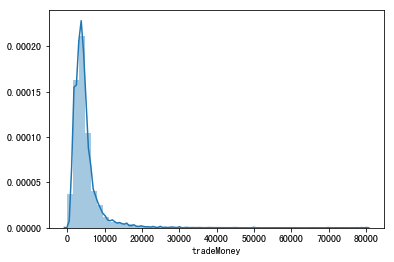

In [50]:
y = data_train['tradeMoney']

sns.distplot(data_train[(y<=80000)]['tradeMoney'])

### 峰度：峰度（Kurtosis）是描述某变量所有取值分布形态陡缓程度的统计量。

它是和正态分布相比较的

* Kurtosis=0 与正态分布的陡缓程度相同。

* Kurtosis>0 比正态分布的高峰更加陡峭——尖顶峰

* Kurtosis<0 比正态分布的高峰来得平台——平顶峰计算公式：β = M_4 /σ^4 

### 偏度：偏度（Skewness）是描述某变量取值分布对称性的统计量。

* Skewness=0 分布形态与正态分布偏度相同
* Skewness>0 正偏差数值较大，为正偏或右偏。长尾巴拖在右边。
* Skewness<0 负偏差数值较大，为负偏或左偏。长尾巴拖在左边。 计算公式： S= (X^ - M_0)/δ Skewness 越大，分布形态偏移程度越大。

In [53]:
#skewness and kurtosis
print("Kurtosis: %f" % data_train['tradeMoney'].kurt())
print("Skewness: %f" % data_train['tradeMoney'].skew())

Kurtosis: 27724.033574
Skewness: 162.014366


### 分析

房屋租金大部分**少于10000元**

数据高峰陡峭，为正偏分布，图像长尾巴拖在右边